# Image Processing

## Introduction

## Key Concepts Covered

## Dependencies


In [21]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import random
from typing import Tuple, List, Optional

# Configure matplotlib for better display in notebook
plt.style.use('seaborn')
%matplotlib inline

# Set random seed for reproducibility
np.random.seed(42)

/var/folders/l3/ydlbbfvj1bg_xldxmdjf0kqr0000gn/T/ipykernel_52811/2391703102.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## Helper Functions

First we need to create some utility functions that will help develop and test our algoirthms:
1. Load and preprocess images
2. Display results for comparison
3. Analyze image characteristics

In [22]:
def load_image(image_path):
    """Load and convert an image to grayscale.
    Returns:
        numpy.ndarray: Grayscale image array with values 0-255
    """
    try:
        with Image.open(image_path) as img:
            if img.mode != 'L':
                img = img.convert('L')
            # Convert to numpy array and ensure correct dtype
            return np.array(img, dtype=np.uint8)
    except Exception as e:
        raise ValueError(f"Error processing image: {str(e)}")

def display_images(images, titles=None, figsize=(15, 5), cmap='gray',border_color='black', border_width=1):
    """Display images in a truly compact grid layout with maximum 4 images per row.
    
    This function creates a highly compact display by carefully controlling both the
    figure size and the spacing between subplots. It uses a combination of GridSpec
    and figure size calculations to ensure images are displayed with minimal gaps
    while maintaining readability.
    
    Args:
        images (list): List of images to display
        titles (list): Optional list of titles for each image
        figsize (tuple): Base figure size (width, height) used as a reference for calculations
        cmap (str): Colormap to use for displaying images
    """
    n = len(images)
    if titles is None:
        titles = [f'Image {i+1}' for i in range(n)]
    
    # Calculate grid dimensions
    cols = min(n, 4)
    rows = (n + cols - 1) // cols
    
    # Calculate figure size differently to ensure compact layout
    # Use the aspect ratio of the first image to maintain proportions
    sample_image = images[0]
    aspect_ratio = sample_image.shape[0] / sample_image.shape[1]
    
    # Base width calculation considering the number of columns
    base_unit = 4  # Base unit for size calculations
    fig_width = base_unit * cols
    fig_height = base_unit * aspect_ratio * rows
    
    # Create figure and GridSpec with tight spacing
    fig = plt.figure(figsize=(fig_width, fig_height))
    gs = plt.GridSpec(rows, cols, figure=fig,
                     left=0.01, right=0.99,
                     bottom=0.01, top=0.90,
                     wspace=0.01, hspace=0.15)
    
    # Create and populate subplots
    for idx in range(n):
        row = idx // cols
        col = idx % cols
        
        # Create subplot
        ax = fig.add_subplot(gs[row, col])
        
        # Display image without interpolation for sharper display
        ax.imshow(images[idx], cmap=cmap, interpolation='nearest')
        ax.set_title(titles[idx], pad=2, fontsize=14)
        
        # Remove all axes elements
        ax.set_xticks([])
        ax.set_yticks([])
        for spine in ax.spines.values():
                    spine.set_visible(True)  # Make sure spine is visible
                    spine.set_color(border_color)  # Set border color
                    spine.set_linewidth(border_width)  # Set border width
    
    plt.show()

def analyze_image(image):
    """Analyze basic characteristics of an image.
    
    Computes and returns useful statistics about the image:
    - Min and max pixel values
    - Mean and median intensity
    - Standard deviation of pixel values
    - Histogram data
    
    Returns:
        dict: Dictionary containing image statistics
    """
    stats = {
        'min': int(np.min(image)),
        'max': int(np.max(image)),
        'mean': float(np.mean(image)),
        'median': float(np.median(image)),
        'std': float(np.std(image))
    }
    
    # Compute histogram
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])
    stats['histogram'] = hist
    stats['bins'] = bins
    
    return stats

def plot_histogram(image, title="Image Histogram", figsize=(10, 4)):
    """Plot the histogram of a grayscale image.
    
    Creates a visualization of the image's intensity distribution,
    which is crucial for understanding how to set thresholds.
    
    Args:
        image (numpy.ndarray): Input grayscale image
        title (str): Title for the plot
        figsize (tuple): Figure size
    """
    plt.figure(figsize=figsize)
    plt.hist(image.ravel(), bins=256, range=[0, 256], density=True, alpha=0.7)
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    plt.show()

def get_random_image(folder_path: str = '../images', seed: Optional[int] = None) -> str:
    """Get a random image path from a directory.
    
    Args:
        folder_path: Directory containing images
        seed: Optional random seed for reproducibility
    
    Returns:
        Path to randomly selected image
    """
    if seed is not None:
        random.seed(seed)
        
    # Define valid image extensions
    valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff')
    
    # Get list of valid image files
    image_files = [
        f for f in os.listdir(folder_path)
        if f.lower().endswith(valid_extensions)
    ]
    
    if not image_files:
        raise ValueError(f"No valid images found in {folder_path}")
    
    # Select random image
    image_file = random.choice(image_files)
    return os.path.join(folder_path, image_file)

def load_image(path: str) -> np.ndarray:
    """Load an image and convert to grayscale numpy array."""
    return np.array(Image.open(path).convert('L'))

def display_comparison(original: np.ndarray, 
                      processed_images: List[np.ndarray], 
                      titles: List[str],
                      figsize: Tuple[int, int] = (15, 5)) -> None:
    """Display original image alongside processed versions.
    
    Args:
        original: Original image array
        processed_images: List of processed image arrays
        titles: List of titles for each image
        figsize: Figure size tuple
    """
    n_images = len(processed_images) + 1  # +1 for original
    fig, axes = plt.subplots(1, n_images, figsize=figsize)
    
    # Display original
    axes[0].imshow(original, cmap='gray')
    axes[0].set_title('Original')
    axes[0].axis('off')
    
    # Display processed images
    for i, (img, title) in enumerate(zip(processed_images, titles), 1):
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(title)
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

def add_noise(image: np.ndarray, noise_type: str = 'gaussian', amount: float = 0.1) -> np.ndarray:
    """Add noise to an image for testing filters.
    
    Args:
        image: Input image array
        noise_type: 'gaussian' or 'salt_pepper'
        amount: Noise intensity (0-1)
    """
    noisy = image.copy().astype(float)
    
    if noise_type == 'gaussian':
        noise = np.random.normal(0, amount * 255, image.shape)
        noisy = np.clip(noisy + noise, 0, 255)
    
    elif noise_type == 'salt_pepper':
        # Salt
        salt = np.random.random(image.shape) < amount/2
        noisy[salt] = 255
        
        # Pepper
        pepper = np.random.random(image.shape) < amount/2
        noisy[pepper] = 0
    
    return noisy.astype(np.uint8)

## Pixel Processing

- Basic transformations
- Brightness, Contrast, gamma
- Per-pixel operations

In [23]:
def adjust_brightness(image: np.ndarray, factor: float) -> np.ndarray:
    """Adjust image brightness by multiplying pixel values.
    
    """
    # Ensure we don't exceed valid pixel range
    adjusted = np.clip(image * factor, 0, 255)
    return adjusted.astype(np.uint8)

def adjust_contrast(image: np.ndarray, factor: float) -> np.ndarray:
    """Adjust image contrast using linear scaling.
    
   """
    mean = np.mean(image)
    adjusted = mean + (image - mean) * factor
    return np.clip(adjusted, 0, 255).astype(np.uint8)

def adjust_gamma(image: np.ndarray, gamma: float) -> np.ndarray:
    """adjust gamma correction to image.
    
     """
    # Normalize to 0-1 range for gamma operation
    normalized = image / 255.0
    corrected = np.power(normalized, gamma)
    return (corrected * 255).astype(np.uint8)

def compare_pixel_processing(image_path: str) -> None:
    """Compare different pixel processing operations."""
    # Load image
    original = load_image(image_path)
    
    # adjust different pixel processing operations
    brightened = adjust_brightness(original, 1.5)
    darkened = adjust_brightness(original, 0.5)
    high_contrast = adjust_contrast(original, 1.5)
    low_contrast = adjust_contrast(original, 0.5)
    gamma_high = adjust_gamma(original, 1.5)
    gamma_low = adjust_gamma(original, 0.5)
    
    # Create comparisons
    # First row: Brightness adjustments
    display_comparison(original, 
                      [brightened, darkened],
                      ['Brightened (1.5x)', 'Darkened (0.5x)'])
    
    # Second row: Contrast adjustments
    display_comparison(original,
                      [high_contrast, low_contrast],
                      ['High Contrast (1.5x)', 'Low Contrast (0.5x)'])
    
    # Third row: Gamma corrections
    display_comparison(original,
                      [gamma_high, gamma_low],
                      ['Gamma 1.5', 'Gamma 0.5'])


## Convolution

- Kernels
- Linear Image Filters
- Non-Linear Image Filters
- Template Matching (for object and pattern matching)

In [24]:
def convolve2d(image: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    """Implement 2D convolution from scratch.
    
    This function performs 2D convolution between an image and a kernel.
    It includes proper padding to maintain the input image size.
    
    Args:
        image: Input image array
        kernel: Convolution kernel
        
    Returns:
        Convolved image array
    """
    # Get sizes of image and kernel
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # Calculate padding sizes
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    
    # Create padded image using reflection padding
    padded_image = np.pad(image, 
                         ((pad_height, pad_height), 
                          (pad_width, pad_width)), 
                         mode='reflect')
    
    # Initialize output array
    output = np.zeros_like(image, dtype=np.float32)
    
    # Perform convolution
    for i in range(img_height):
        for j in range(img_width):
            # Extract the region to apply the kernel
            region = padded_image[i:i + kernel_height, 
                                j:j + kernel_width]
            # Apply kernel and sum
            output[i, j] = np.sum(region * kernel)
    
    return output

def correlate2d(image: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    """Implement 2D correlation from scratch.
    
    Similar to convolution but without flipping the kernel.
    Used primarily in template matching.
    """
    # Get sizes
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # Calculate output dimensions
    out_height = img_height - kernel_height + 1
    out_width = img_width - kernel_width + 1
    
    # Initialize output array
    output = np.zeros((out_height, out_width), dtype=np.float32)
    
    # Perform correlation
    for i in range(out_height):
        for j in range(out_width):
            region = image[i:i + kernel_height, j:j + kernel_width]
            output[i, j] = np.sum(region * kernel)
    
    return output

def create_gaussian_kernel(size: int, sigma: float) -> np.ndarray:
    """Create a 2D Gaussian kernel for filtering.
    
    Args:
        size: Kernel size (should be odd)
        sigma: Standard deviation of Gaussian
    """
    if size % 2 == 0:
        raise ValueError("Kernel size must be odd")
        
    # Create 1D coordinate arrays
    coord = np.arange(-(size // 2), size // 2 + 1)
    x, y = np.meshgrid(coord, coord)
    
    # Calculate Gaussian values
    gaussian = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    
    # Normalize the kernel
    return gaussian / np.sum(gaussian)

def apply_filter(image: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    #Apply a filter kernel to an image using our custom convolution.

    filtered = convolve2d(image, kernel)
    return np.clip(filtered, 0, 255).astype(np.uint8)



### Linear Filter

In [25]:

def mean_filter(image: np.ndarray, size: int = 3) -> np.ndarray:
    #Apply mean (average) filter using custom convolution.

    kernel = np.ones((size, size)) / (size * size)
    return apply_filter(image, kernel)


def gaussian_filter(image: np.ndarray, size: int = 3, sigma: float = 1.0) -> np.ndarray:
    #Apply Gaussian filter using custom convolution.

    kernel = create_gaussian_kernel(size, sigma)
    return apply_filter(image, kernel)


def compare_linear_filters(image_path: str) -> None:
    """Compare different linear filtering operations."""
    # Load image and add noise for better visualization
    original = load_image(image_path)
    noisy = add_noise(original, 'gaussian', 0.1)
    
    # Apply different linear filters
    mean_3x3 = mean_filter(noisy, size=3)
    mean_5x5 = mean_filter(noisy, size=5)
    gauss_small = gaussian_filter(noisy, size=3, sigma=1.0)
    gauss_large = gaussian_filter(noisy, size=5, sigma=2.0)
    
    # Display original and noisy images
    display_comparison(original, [noisy], ['Noisy Image'])
    
    # Display mean filter results
    display_comparison(noisy, 
                      [mean_3x3, mean_5x5],
                      ['Mean 3x3', 'Mean 5x5'])
    
    # Display Gaussian filter results
    display_comparison(noisy,
                      [gauss_small, gauss_large],
                      ['Gaussian 3x3 (σ=1.0)', 'Gaussian 5x5 (σ=2.0)'])

In [ ]:
compare_linear_filters(get_random_image())

## Non-linear image filter

In [31]:


def median_filter(image: np.ndarray, size: int = 3) -> np.ndarray:
    #Apply median filter using custom convolution.
    # Paddding
    pad = size // 2
    
    # Pad image
    padded = np.pad(image, pad, mode='reflect')
    
    # Initialize output array
    output = np.zeros_like(image)
    
    # Apply median filter
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = padded[i:i + size, j:j + size]

            # Calculate median value within the window
            output[i, j] = np.median(window)
            
    return output.astype(np.uint8)


def bilateral_filter(image: np.ndarray, 
                    size: int = 5, 
                    sigma_spatial: float = 1.0,
                    sigma_intensity: float = 50.0) -> np.ndarray:
    """Apply bilateral filter for edge-preserving smoothing.
    
    Args:
        image: Input grayscale image
        size: Filter window size
        sigma_spatial: Standard deviation for spatial kernel
        sigma_intensity: Standard deviation for intensity kernel
    """
    # Create spatial Gaussian kernel
    spatial_kernel = create_gaussian_kernel(size, sigma_spatial)
    
    # Initialize output
    output = np.zeros_like(image, dtype=np.float32)
    pad = size // 2
    
    # Pad image for border handling
    padded = np.pad(image, pad, mode='reflect')
    
    # Apply bilateral filter
    for i in range(pad, padded.shape[0] - pad):
        for j in range(pad, padded.shape[1] - pad):
            # Extract window
            window = padded[i-pad:i+pad+1, j-pad:j+pad+1]
            
            # Calculate intensity weights
            intensity_diff = window - padded[i, j]
            intensity_weights = np.exp(-np.square(intensity_diff) / (2 * sigma_intensity**2))
            
            # Combine spatial and intensity weights
            weights = spatial_kernel * intensity_weights
            weights = weights / np.sum(weights)
            
            # Calculate filtered value
            output[i-pad, j-pad] = np.sum(window * weights)
    
    return output.astype(np.uint8)

def compare_nonlinear_filters(image_path: str) -> None:
    """Compare different non-linear filtering operations."""
    # Load image and add different types of noise
    original = load_image(image_path)
    gaussian_noise = add_noise(original, 'gaussian', 0.1)
    sp_noise = add_noise(original, 'salt_pepper', 0.1)
    
    # Apply filters to gaussian noise
    median_gauss = median_filter(gaussian_noise, size=3)
    bilateral_gauss = bilateral_filter(gaussian_noise)
    
    # Apply filters to salt & pepper noise
    median_sp = median_filter(sp_noise, size=3)
    bilateral_sp = bilateral_filter(sp_noise)
    
    # Display results for Gaussian noise
    display_comparison(original, 
                      [gaussian_noise, median_gauss, bilateral_gauss],
                      ['Gaussian Noise', 'Median Filter', 'Bilateral Filter'])
    
    # Display results for Salt & Pepper noise
    display_comparison(original,
                      [sp_noise, median_sp, bilateral_sp],
                      ['Salt & Pepper Noise', 'Median Filter', 'Bilateral Filter'])


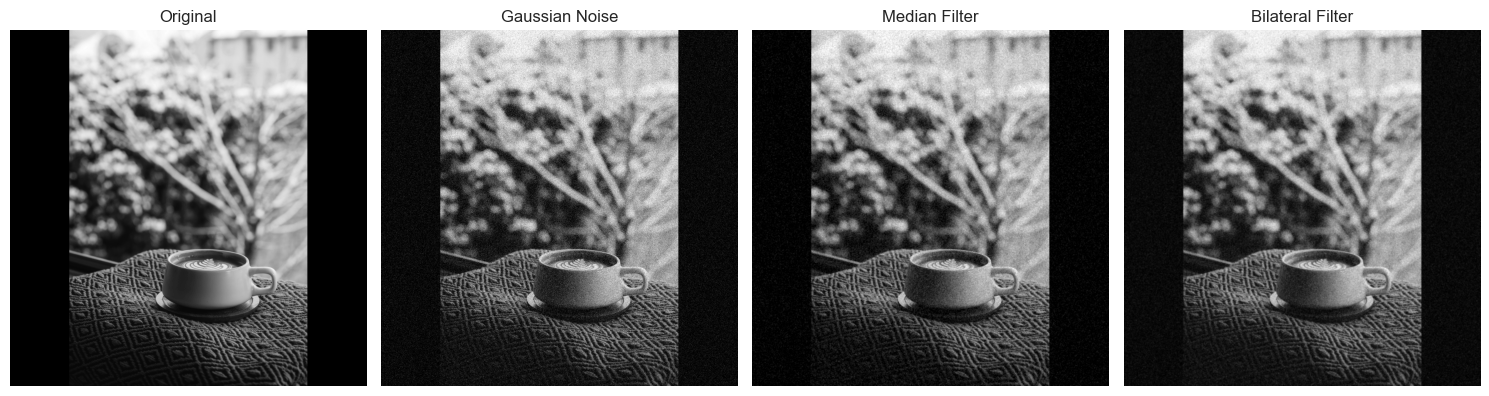

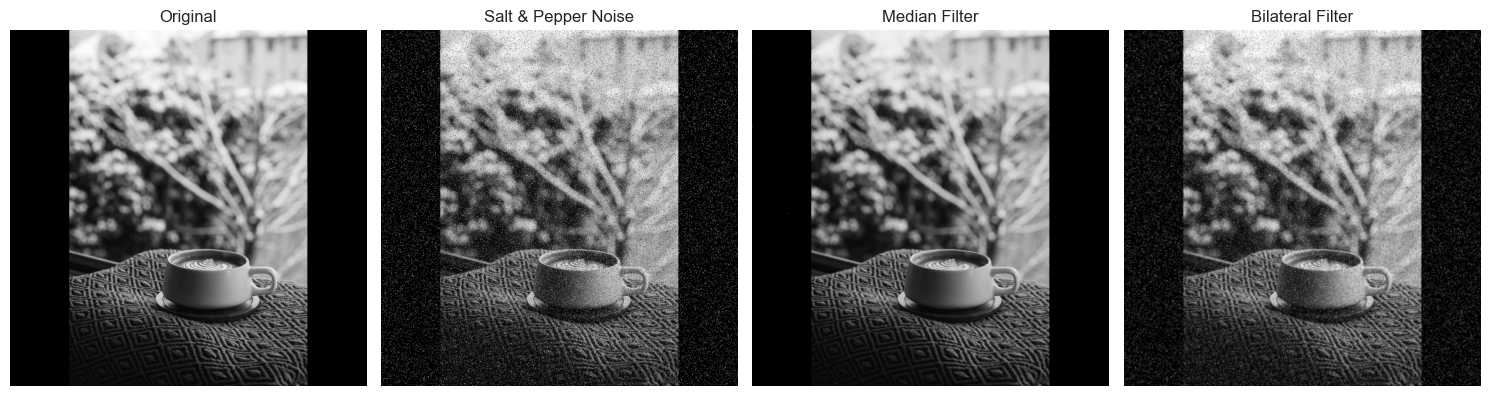

In [29]:
compare_nonlinear_filters(get_random_image())

## Laplace Filter

In [ ]:
def laplacian_filter(image: np.ndarray) -> np.ndarray:
    """Apply Laplacian filter for edge detection.
    
    The Laplacian filter detects edges by finding rapid intensity changes
    in both x and y directions simultaneously. We use a 3x3 kernel that
    approximates the second derivative.
    """
    # Define Laplacian kernel
    kernel = np.array([[0, 1, 0],
                      [1, -4, 1],
                      [0, 1, 0]])
    
    # Apply convolution
    edges = convolve2d(image, kernel)
    
    # Normalize to better visualize edges
    edges = np.abs(edges)
    edges = (edges / np.max(edges) * 255).astype(np.uint8)
    
    return edges

def compare_edge_detection(image_path: str) -> None:
    """Compare original image with its edge detection result."""
    # Load image
    original = load_image(image_path)
    
    # Apply Laplacian edge detection
    edges = laplacian_filter(original)
    
    # Display results
    display_comparison(original, 
                      [edges],
                      ['Laplacian Edges'])
    
    print("Laplacian filter highlights edges by detecting rapid intensity changes.")
    print("Brighter pixels indicate stronger edges.")


compare_edge_detection(get_random_image())

### Template Matching

In [37]:
def template_match(image: np.ndarray, 
                  template: np.ndarray, 
                  method: str = 'ncc') -> Tuple[np.ndarray, tuple]:
    # Perform Template Matching
    if method == 'ncc':
        # Compute correlation
        correlation = correlate2d(image, template)
        
        # Compute normalizing factors
        template_norm = np.sqrt(np.sum(template**2))
        
        # Compute local image norms
        img_squares = correlate2d(image**2, np.ones_like(template))
        img_norms = np.sqrt(img_squares)
        
        # Normalize correlation
        result = correlation / (img_norms * template_norm + 1e-10)
        
    elif method == 'ssd':
        # Get output dimensions
        out_height = image.shape[0] - template.shape[0] + 1
        out_width = image.shape[1] - template.shape[1] + 1
        result = np.zeros((out_height, out_width))
        
        # Compute sum of squared differences
        for i in range(out_height):
            for j in range(out_width):
                region = image[i:i + template.shape[0], 
                             j:j + template.shape[1]]
                result[i, j] = -np.sum((region - template)**2)
    
    else:
        raise ValueError("Method must be 'ncc' or 'ssd'")
    
    # Find best match
    match_pos = np.unravel_index(np.argmax(result), result.shape)
    
    return result, match_pos


def demonstrate_template_matching(image_path: str) -> None:
    """Demonstrate template matching with a region from the image itself."""
    # Load image
    original = load_image(image_path)
    
    # Create a template from a portion of the image
    h, w = original.shape
    template_size = (h//4, w//4)  # Use quarter of image dimensions
    start_h = h//3
    start_w = w//3
    template = original[start_h:start_h + template_size[0], 
                       start_w:start_w + template_size[1]]
    
    # Perform template matching
    correlation_map, best_match = template_match(original, template)
    
    # Visualize results
    plt.figure(figsize=(15, 5))
    
    # Original image with template region highlighted
    plt.subplot(131)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image\nwith Template Region')
    plt.plot([start_w, start_w + template_size[1], 
              start_w + template_size[1], start_w, start_w],
             [start_h, start_h, 
              start_h + template_size[0], start_h + template_size[0], start_h],
             'r-', linewidth=2)
    plt.axis('off')
    
    # Template
    plt.subplot(132)
    plt.imshow(template, cmap='gray')
    plt.title('Template')
    plt.axis('off')
    
    # Correlation map
    plt.subplot(133)
    plt.imshow(correlation_map, cmap='jet')
    plt.colorbar()
    plt.title('Correlation Map\n(Brighter = Better Match)')
    plt.plot(best_match[1], best_match[0], 'r+', markersize=15)
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print("\nTemplate Matching Results:")
    print(f"Best match found at position: {best_match}")
    print("The correlation map shows how well the template matches at each position.")
    print("Brighter regions indicate better matches.")

# Example usage functions
def template_matching(folder_path: str = '../images', seed: Optional[int] = None) -> None:
    """Test both edge detection and template matching on a random image."""
    image_path = get_random_image(folder_path, seed)
    print(f"Processing image: {os.path.basename(image_path)}\n")
    
    print("\n2. Template Matching Results:")
    demonstrate_template_matching(image_path)

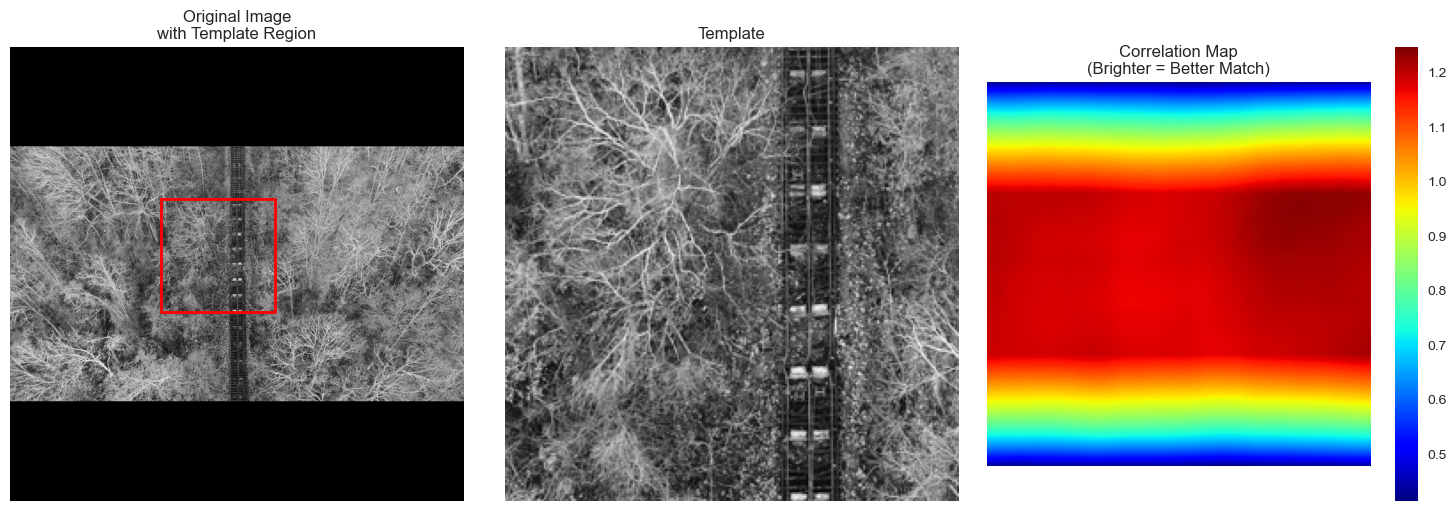


Template Matching Results:
Best match found at position: (259, 602)
The correlation map shows how well the template matches at each position.
Brighter regions indicate better matches.


In [38]:
demonstrate_template_matching(get_random_image())